# Agregación de datos por categoría

In [1]:
import numpy as np
import pandas as pd

In [2]:
gender = ["Male", "Female"]
income = ["Poor", "Middle Class", "Rich"]

In [3]:
n = 500

gender_data = []
income_data = []

for i in range(0,500):
    gender_data.append(np.random.choice(gender)) #choice() para que eliga un elemento aleatorio cada vez(Male o Female) y los meta en la lista
    income_data.append(np.random.choice(income))

In [4]:
gender_data[1:10]

['Male',
 'Male',
 'Male',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male']

In [5]:
income_data[1:10]

['Middle Class',
 'Rich',
 'Rich',
 'Poor',
 'Middle Class',
 'Middle Class',
 'Rich',
 'Poor',
 'Poor']

In [6]:
# Z-test-> Z-Valor = Z = (X - mu) / (sd/sqrt(N)) -> N(0,1), X = mu + sd * Z 
# con N(media, desviacion tipica)= N(m,s)
#N(m, s) -> m + std * Z
height = 160 + 30 * np.random.randn(n) #160 de promedio y una desviacion de +/-30 cm
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.rand(n) #ingresos

In [7]:
data = pd.DataFrame(
    {
        "Gender" : gender_data,
        "Economic Status" : income_data,
        "Height" : height,
        "Weight" : weight,
        "Age" : age,
        "Income" : income
    }
)

In [8]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Poor,135.633343,43.185213,33.192967,20624.610868
1,Male,Middle Class,112.588980,65.041776,42.285700,19165.305533
2,Male,Rich,110.309989,91.681830,15.054784,18682.744948
3,Male,Rich,53.017063,89.031410,18.002500,19081.108356
4,Male,Poor,197.245555,56.805327,12.494549,19606.369546


## Agrupación de datos

In [9]:
grouped_gender = data.groupby("Gender")

In [10]:
grouped_gender.groups

{'Female': Int64Index([  5,   6,   7,   8,  12,  14,  15,  22,  25,  31,
             ...
             485, 487, 489, 490, 491, 493, 494, 495, 496, 498],
            dtype='int64', length=245),
 'Male': Int64Index([  0,   1,   2,   3,   4,   9,  10,  11,  13,  16,
             ...
             475, 478, 480, 482, 483, 486, 488, 492, 497, 499],
            dtype='int64', length=255)}

In [11]:
for names, groups in grouped_gender:
    print(names) #que salga male y female arriba separando cada grupo
    print(groups)

Female
     Gender Economic Status      Height     Weight        Age        Income
5    Female    Middle Class  145.126934  29.846851  25.898017  21333.210233
6    Female    Middle Class  175.551926  82.993256  32.829449  19380.856967
7    Female            Rich  140.566641  79.008503   5.758938  20075.551130
8    Female            Poor  128.168753  27.659464  29.579788  20254.134763
12   Female    Middle Class  117.030350  61.921229  39.393299  19602.776176
..      ...             ...         ...        ...        ...           ...
493  Female    Middle Class   58.699663  55.712110  32.444133  20865.596491
494  Female    Middle Class  142.790569  97.539035  30.554166  19982.746025
495  Female            Rich  161.479987  49.692503  35.673745  18259.440342
496  Female            Poor  153.710447  14.365686  29.128773  21042.423990
498  Female            Poor  163.930556  83.514362  28.031908  19618.782128

[245 rows x 6 columns]
Male
    Gender Economic Status      Height     Weight   

In [12]:
grouped_gender.get_group("Female")

,Gender,Economic Status,Height,Weight,Age,Income
5,Female,Middle Class,145.126934,29.846851,25.898017,21333.210233
6,Female,Middle Class,175.551926,82.993256,32.829449,19380.856967
7,Female,Rich,140.566641,79.008503,5.758938,20075.551130
8,Female,Poor,128.168753,27.659464,29.579788,20254.134763
12,Female,Middle Class,117.030350,61.921229,39.393299,19602.776176
...,...,...,...,...,...,...
493,Female,Middle Class,58.699663,55.712110,32.444133,20865.596491
494,Female,Middle Class,142.790569,97.539035,30.554166,19982.746025
495,Female,Rich,161.479987,49.692503,35.673745,18259.440342
496,Female,Poor,153.710447,14.365686,29.128773,21042.423990


In [13]:
double_group = data.groupby(["Gender", "Economic Status"])

In [14]:
len(double_group)

6

In [15]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height     Weight        Age        Income
5    Female    Middle Class  145.126934  29.846851  25.898017  21333.210233
6    Female    Middle Class  175.551926  82.993256  32.829449  19380.856967
12   Female    Middle Class  117.030350  61.921229  39.393299  19602.776176
25   Female    Middle Class  220.381438  68.400832  29.570996  19760.016095
47   Female    Middle Class  110.003122  98.368281  22.185315  21409.040635
..      ...             ...         ...        ...        ...           ...
471  Female    Middle Class  177.971301  84.262189  37.510775  18461.179636
472  Female    Middle Class  155.934275  63.991908  30.243544  18831.349520
490  Female    Middle Class  194.645237  34.811264  26.689543  20907.825387
493  Female    Middle Class   58.699663  55.712110  32.444133  20865.596491
494  Female    Middle Class  142.790569  97.539035  30.554166  19982.746025

[83 rows x 6 columns]
('Female', 'Poor')
     Gender Economi

## Operaciones sobre datos agrupados

In [16]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     13312.254927  5234.817697  2499.672906  1.647037e+06
       Poor             14457.175749  6338.790197  2922.351077  1.846580e+06
       Rich             10578.786195  4340.467804  2132.893678  1.340767e+06
Male   Middle Class     13437.727261  6015.022559  2523.378673  1.730236e+06
       Poor             14317.125310  5802.710698  2825.244356  1.756162e+06
       Rich             12368.610936  4954.390192  2322.688203  1.547808e+06

In [17]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     160.388614  63.070093  30.116541  19843.824480
       Poor             153.799742  67.433938  31.088841  19644.470287
       Rich             155.570385  63.830409  31.366084  19717.157565
Male   Middle Class     152.701446  68.352529  28.674758  19661.768451
       Poor             160.866577  65.198997  31.744319  19732.158490
       Rich             158.571935  63.517823  29.778054  19843.696013

In [18]:
double_group.size()

Gender  Economic Status
Female  Middle Class       83
        Poor               94
        Rich               68
Male    Middle Class       88
        Poor               89
        Rich               78
dtype: int64

In [19]:
double_group.describe() #nos saca la descripcion de cada columna agrupados por genero y clase social

Height                                                \
                        count        mean        std        min         25%   
Gender Economic Status                                                        
Female Middle Class      83.0  160.388614  32.675222  58.699663  135.416483   
       Poor              94.0  153.799742  27.725899  82.866330  138.466782   
       Rich              68.0  155.570385  31.745543  85.918858  130.914819   
Male   Middle Class      88.0  152.701446  30.672039  87.080349  133.301689   
       Poor              89.0  160.866577  30.052009  82.636767  140.074840   
       Rich              78.0  158.571935  34.915171  53.017063  139.622164   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     160.245985  178.259074  238.490270   83.0  63.070093   
       Poor             154.424458  171.245225  221.572253   94.0  67.433938   
       Rich             158.446708  174.852091  232.037575   68.0  63.830409   
Male   Middle Class     156.617236  172.394430  209.529500   88.0  68.352529   
       Poor             158.499886  187.579880  226.823948   89.0  65.198997   
       Rich             161.693909  184.970913  222.425096   78.0  63.517823   

                        ...        Age            Income                \
                        ...        75%        max  count          mean   
Gender Economic Status  ...                                              
Female Middle Class     ...  38.332049  53.309725   83.0  19843.824480   
       Poor             ...  38.783271  54.482883   94.0  19644.470287   
       Rich             ...  36.815145  59.087636   68.0  19717.157565   
Male   Middle Class     ...  37.418189  56.129910   88.0  19661.768451   
       Poor             ...  39.382396  62.739207   89.0  19732.158490   
       Rich             ...  38.475009  60.799858   78.0  19843.696013   

                                                                               \
                                std           min           25%           50%   
Gender Economic Status                                                          
Female Middle Class     1057.634974  18033.404472  18941.908643  19982.746025   
       Poor             1018.720484  18000.406173  18608.873030  19714.450788   
       Rich             1191.276783  18008.207343  18505.376440  19477.177165   
Male   Middle Class      914.616764  18018.041459  18973.984789  19502.641434   
       Poor             1093.995575  18009.940545  18824.572710  19745.117691   
       Rich             1030.470109  18092.817304  18898.355324  20014.758968   

                                                    
                                 75%           max  
Gender Economic Status                              
Female Middle Class     20798.837479  21409.040635  
       Poor             20463.570416  21459.754542  
       Rich             20902.909713  21472.113526  
Male   Middle Class     20392.286403  21464.186931  
       Poor             20692.147744  21496.061566  
       Rich             20777.127129  21471.878779  

[6 rows x 32 columns]

In [20]:
grouped_income = double_group["Income"] #nos quedmoas solo con la columna Income

In [21]:
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      83.0  19843.824480  1057.634974  18033.404472   
       Poor              94.0  19644.470287  1018.720484  18000.406173   
       Rich              68.0  19717.157565  1191.276783  18008.207343   
Male   Middle Class      88.0  19661.768451   914.616764  18018.041459   
       Poor              89.0  19732.158490  1093.995575  18009.940545   
       Rich              78.0  19843.696013  1030.470109  18092.817304   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     18941.908643  19982.746025  20798.837479  21409.040635  
       Poor             18608.873030  19714.450788  20463.570416  21459.754542  
       Rich             18505.376440  19477.177165  20902.909713  21472.113526  
Male   Middle Class     18973.984789  19502.641434  20392.286403  21464.186931  
       Poor             18824.572710  19745.117691  20692.147744  21496.061566  
       Rich             18898.355324  20014.758968  20777.127129  21471.878779

In [22]:
double_group.aggregate( 
    {
        "Income": np.sum,
        "Age" : np.mean,
        "Height" : np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.647037e+06  30.116541  32.675222
       Poor             1.846580e+06  31.088841  27.725899
       Rich             1.340767e+06  31.366084  31.745543
Male   Middle Class     1.730236e+06  28.674758  30.672039
       Poor             1.756162e+06  31.744319  30.052009
       Rich             1.547808e+06  29.778054  34.915171

In [23]:
double_group.aggregate(
    {
        "Age" : np.mean,
        "Height" : lambda h:(np.mean(h))/np.std(h)
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     30.116541  4.938410
       Poor             31.088841  5.576894
       Rich             31.366084  4.936978
Male   Middle Class     28.674758  5.007053
       Poor             31.744319  5.383268
       Rich             29.778054  4.571030

In [24]:
double_group.aggregate([np.sum, np.mean, np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     13312.254927  160.388614  32.675222  5234.817697   
       Poor             14457.175749  153.799742  27.725899  6338.790197   
       Rich             10578.786195  155.570385  31.745543  4340.467804   
Male   Middle Class     13437.727261  152.701446  30.672039  6015.022559   
       Poor             14317.125310  160.866577  30.052009  5802.710698   
       Rich             12368.610936  158.571935  34.915171  4954.390192   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Female Middle Class     63.070093  24.606236  2499.672906  30.116541   
       Poor             67.433938  27.160452  2922.351077  31.088841   
       Rich             63.830409  22.426228  2132.893678  31.366084   
Male   Middle Class     68.352529  23.339328  2523.378673  28.674758   
       Poor             65.198997  25.192411  2825.244356  31.744319   
       Rich             63.517823  24.385875  2322.688203  29.778054   

                                         Income                             
                              std           sum          mean          std  
Gender Economic Status                                                      
Female Middle Class     11.414921  1.647037e+06  19843.824480  1057.634974  
       Poor             11.239694  1.846580e+06  19644.470287  1018.720484  
       Rich             11.567811  1.340767e+06  19717.157565  1191.276783  
Male   Middle Class     11.039434  1.730236e+06  19661.768451   914.616764  
       Poor             11.877899  1.756162e+06  19732.158490  1093.995575  
       Rich             12.397924  1.547808e+06  19843.696013  1030.470109

In [25]:
double_group.aggregate([lambda x: np.mean(x) / np.std(x)])

Height    Weight       Age     Income
                        <lambda>  <lambda>  <lambda>   <lambda>
Gender Economic Status                                         
Female Middle Class     4.938410  2.578757  2.654387  18.876510
       Poor             5.576894  2.496111  2.780818  19.386872
       Rich             4.936978  2.867401  2.731657  16.674341
Male   Middle Class     5.007053  2.945425  2.612370  21.620470
       Poor             5.383268  2.602704  2.687695  18.138973
       Rich             4.571030  2.621556  2.417404  19.381577

## Filtrado de datos

In [26]:
# Nos quedamos con las personas cuya suma de edad supere los 2400
# (clasificados por clase y genero dados por double group)
double_group["Age"].filter(lambda x: x.sum()>2400)

0      33.192967
1      42.285700
4      12.494549
5      25.898017
6      32.829449
         ...    
493    32.444133
494    30.554166
496    29.128773
498    28.031908
499    22.726568
Name: Age, Length: 354, dtype: float64

## Transformación de variables

In [27]:
zscore = lambda x : (x - x.mean())/x.std() #donde x simboliza cada valor de una columna
zscore

<function __main__.<lambda>(x)>

In [28]:
z_group = double_group.transform(zscore)
z_group

,Height,Weight,Age,Income
0,-0.839652,-0.873826,0.121962,0.815773
1,-1.307786,-0.141853,1.232938,-0.542810
2,-1.382263,1.154931,-1.187559,-1.126623
3,-3.023181,1.046244,-0.949800,-0.740039
4,1.210534,-0.333182,-1.620638,-0.114981
...,...,...,...,...
495,0.186155,-0.630418,0.372383,-1.223660
496,-0.003221,-1.953880,-0.174388,1.372264
497,-0.548797,-0.445722,1.043669,-1.348834
498,0.365392,0.592053,-0.271977,-0.025216


In [29]:
import matplotlib.pyplot as plt

(array([  7.,   7.,  42.,  74.,  93., 107.,  87.,  48.,  26.,   9.]),
 array([-2.87203091, -2.32388194, -1.77573298, -1.22758402, -0.67943506,
        -0.13128609,  0.41686287,  0.96501183,  1.5131608 ,  2.06130976,
         2.60945872]),
 <a list of 10 Patch objects>)

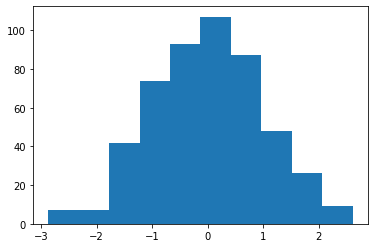

In [30]:
plt.hist(z_group["Age"])

In [31]:
fill_na_mean = lambda x : x.fillna(x.mean())

In [32]:
double_group.transform(fill_na_mean) ##rellenamos los NA por el promedio

,Height,Weight,Age,Income
0,135.633343,43.185213,33.192967,20624.610868
1,112.588980,65.041776,42.285700,19165.305533
2,110.309989,91.681830,15.054784,18682.744948
3,53.017063,89.031410,18.002500,19081.108356
4,197.245555,56.805327,12.494549,19606.369546
...,...,...,...,...
495,161.479987,49.692503,35.673745,18259.440342
496,153.710447,14.365686,29.128773,21042.423990
497,139.410593,52.648501,42.717379,18453.762485
498,163.930556,83.514362,28.031908,19618.782128


## Operaciones diversas muy útiles

In [33]:
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Poor,135.633343,43.185213,33.192967,20624.610868
1,Male,Middle Class,112.588980,65.041776,42.285700,19165.305533
2,Male,Rich,110.309989,91.681830,15.054784,18682.744948
5,Female,Middle Class,145.126934,29.846851,25.898017,21333.210233
7,Female,Rich,140.566641,79.008503,5.758938,20075.551130
8,Female,Poor,128.168753,27.659464,29.579788,20254.134763


In [34]:
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
492,Male,Poor,156.041385,55.986266,29.232302,20175.014378
494,Female,Middle Class,142.790569,97.539035,30.554166,19982.746025
495,Female,Rich,161.479987,49.692503,35.673745,18259.440342
497,Male,Rich,139.410593,52.648501,42.717379,18453.762485
498,Female,Poor,163.930556,83.514362,28.031908,19618.782128
499,Male,Middle Class,90.146506,48.744338,22.726568,20385.743743


In [35]:
double_group.nth(32) #para que que nos saque elementos intermedios entre la cabecera y la cola

Height      Weight        Age        Income
Gender Economic Status                                                 
Female Middle Class     163.081524   72.586338  26.816862  20683.254747
       Poor             117.030434   48.859084  21.462591  18734.544598
       Rich             172.446315   52.559150  46.132869  19399.458695
Male   Middle Class     193.395810   77.981865  50.232345  18334.741981
       Poor             148.142707  101.694967  38.986966  20849.138698
       Rich             166.014385   84.363723  18.482137  20485.941220

In [36]:
double_group.nth(82)

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     142.790569  97.539035  30.554166  19982.746025
       Poor             161.311513  31.833847  27.325962  18771.268731
Male   Middle Class     121.924203  76.719194  28.299668  21352.099435
       Poor             169.320729  48.665957  23.798148  18874.013545

In [37]:
data_sorted = data.sort_values(["Age", "Income"]) #primero se ordena por edad y luego por nivel de ingresos

In [38]:
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
314,Male,Rich,220.767312,17.871607,-5.829167,19627.545406
259,Female,Poor,184.386334,89.648947,-0.840779,20700.464299
147,Male,Rich,127.220213,80.116984,-0.590303,20897.836404
260,Female,Middle Class,207.102844,67.782773,0.403951,19750.210150
242,Female,Middle Class,113.050775,70.993367,1.999829,21237.777731
238,Male,Poor,124.802316,123.221123,2.987689,20531.203726
425,Female,Poor,154.527549,97.689719,3.218749,20331.287562
218,Male,Middle Class,200.167982,119.881082,5.033504,19340.392465
7,Female,Rich,140.566641,79.008503,5.758938,20075.551130
140,Male,Middle Class,134.519611,72.033032,5.799620,20322.144089


In [39]:
age_grouped = data_sorted.groupby("Gender")

In [40]:
age_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
314,Male,Rich,220.767312,17.871607,-5.829167,19627.545406
259,Female,Poor,184.386334,89.648947,-0.840779,20700.464299


In [41]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
424,Female,Rich,166.539152,54.191873,59.087636,20821.985158
293,Male,Poor,181.461061,86.375401,62.739207,19346.044551


# Conjunto de entrenamiento y conjunto de testing

In [42]:
import pandas as pd

In [43]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [44]:
len(data)

3333

## 1ª forma: Dividir utilizando la distribución normal

In [45]:
a = np.random.randn(len(data)) #queremos 3333 elementos entre 0 y 1

(array([ 11.,  40., 173., 484., 760., 834., 629., 304.,  76.,  22.]),
 array([-3.48051344, -2.8125349 , -2.14455636, -1.47657782, -0.80859928,
        -0.14062074,  0.5273578 ,  1.19533634,  1.86331488,  2.53129342,
         3.19927196]),
 <a list of 10 Patch objects>)

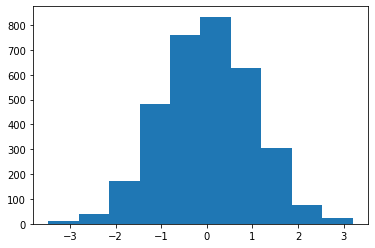

In [46]:
plt.hist(a)

In [47]:
check = (a<0.75) #En este caso queremos el 75% de los datos para entrenar y el resto para testear el modelo

In [48]:
check

array([False,  True, False, ..., False,  True,  True])

(array([ 778.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2555.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

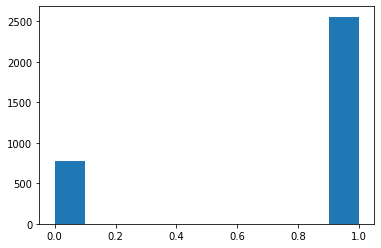

In [49]:
plt.hist(check*1)

In [50]:
training = data[check] #pillamos para entrenar los datos que cumplen True en la variable check de arriba
testing = data[~check] #pillamos para testear los False de check

In [51]:
len(training)

2555

In [52]:
len(testing)

778

## 2ª forma: Con la libreria sklearn

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
train, test = train_test_split(data, test_size = 0.2) #20% para testear(0.2)

In [55]:
len(train)

2666

In [56]:
len(test)

667

## 3ª forma: Usando una función de shuffle

In [57]:
import numpy as np

In [58]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [59]:
import sklearn

In [60]:
data = sklearn.utils.shuffle(data) #con schuffle mezclamos las columnas del data

In [61]:
cut_id = int(0.75*len(data)) #el 75% de data va para entrenamiento del modelo 
train_data = data[:cut_id]
test_data = data[cut_id+1:] #el resto de 75% va para testing

In [62]:
len(train_data)

2499

In [63]:
len(test_data)

833